#Definição dos datasets

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as ss

In [3]:
sns.set_theme()

In [4]:
df_yield = pd.read_csv('https://raw.githubusercontent.com/thiagomrs/icd2021projetoFinal/main/datasets/brazilian-agricultural-production/yield.csv?token=AKCY5EMQEPS5O7SS4AXLHGTA3TMZ2%27').drop(columns='Unnamed: 0')

In [5]:
estados = ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO', 'DF']
estados_amazonia = ['AC', 'AM', 'AP', 'MA', 'MT', 'PA', 'RR', 'RO', 'TO']
df_states = df_yield[['Year', 'Grain']].copy()
df_states.head()
for estado in estados:
    df_states[estado] = df_yield.filter(regex=(".*\(({})\)".format(estado)), axis=1).sum(axis=1, numeric_only=True)
df_states.head()

,Year,Grain,AC,AL,AP,AM,BA,CE,ES,GO,...,RJ,RN,RS,RO,RR,SC,SP,SE,TO,DF
0,1974,Sorghum,0.0,0.0,0.0,0.0,2.546875,1.4375,8.225373,34.665306,...,0.0,4.740299,211.890578,0.0,0.0,6.344444,90.360000,0.0,0.0,0.0
1,1974,Wheat,0.0,0.0,0.0,0.0,0.000000,0.0000,0.000000,0.000000,...,0.0,0.000000,220.266422,0.0,0.0,95.112192,45.910418,0.0,0.0,0.0
2,1975,Sorghum,0.0,0.0,0.0,0.0,0.000000,1.8000,10.477282,44.530196,...,0.0,3.587143,238.088987,0.0,0.0,9.444444,127.239582,0.0,0.0,0.0
3,1975,Wheat,0.0,0.0,0.0,0.0,0.000000,0.0000,0.000000,0.000000,...,0.0,0.000000,142.940974,0.0,0.0,66.279275,45.715157,0.0,0.0,0.0
4,1976,Sorghum,0.0,0.0,0.0,0.0,0.000000,3.8000,5.471429,46.579032,...,0.0,2.699701,224.990268,0.0,0.0,21.932371,148.338034,0.0,0.0,0.0


In [6]:
df_states['Grain'] = df_states['Grain'].astype(str)
df_states['Year'] = df_states['Year'].astype(str)

#Produção por grão

In [7]:
df_yield_per_grain = df_states.drop(columns='Year').groupby(['Grain']).sum().copy()

In [8]:
df_yield_per_grain.insert(0, 'Total', np.zeros(df_yield_per_grain.index.shape))

In [9]:
for grain in df_yield_per_grain.index:
  df_yield_per_grain['Total'].loc[grain] = df_yield_per_grain.drop(columns='Total').loc[grain].sum()
df_yield_per_grain['Total']

Grain
Barley         13379.530100
Beans         135474.408880
Fava Beans      9220.390467
Maize         476005.321848
Oats           18550.750185
Pea             7405.709334
Rye             3163.986127
Sorghum        43884.421144
Soybeans      153967.604837
Wheat          62903.266056
Name: Total, dtype: float64

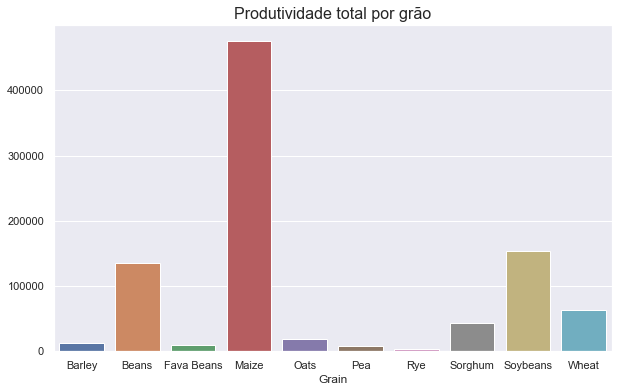

In [10]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x=df_yield_per_grain['Total'].index, y=df_yield_per_grain['Total'].values)
plt.title('Produtividade total por grão', fontsize=16)
plt.show()

#Produção por grão por ano

In [11]:
df_yield_per_grain_per_year = df_states.groupby(['Grain', 'Year']).sum().copy()
df_yield_per_grain_per_year['Total'] = df_yield_per_grain_per_year.sum(axis=1)

In [12]:
grains = ['Barley', 'Beans', 'Fava Beans', 'Maize', 'Oats', 'Pea', 'Rye', 'Sorghum', 'Soybeans', 'Wheat']

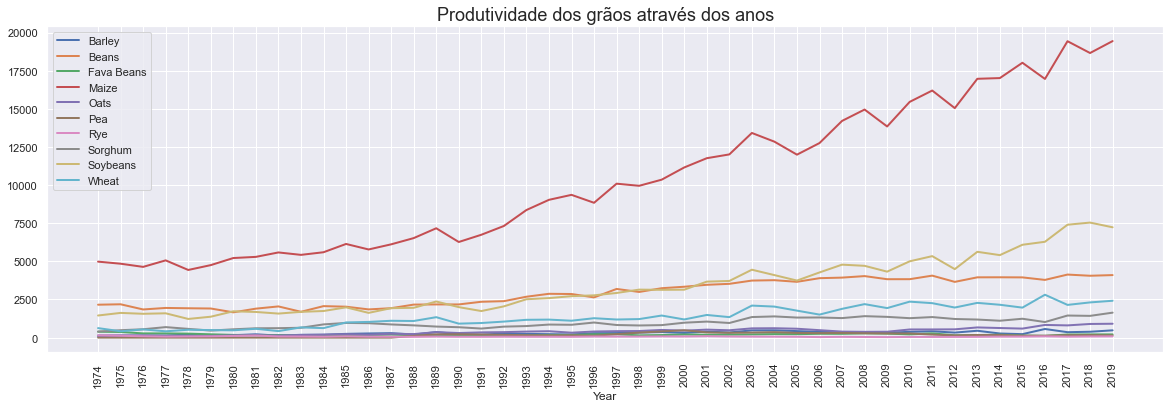

In [13]:
fig = plt.figure(figsize=(20,6))
plt.rcParams['lines.linewidth'] = 2
for grain in grains:
    sns.lineplot(x=df_yield_per_grain_per_year['Total'].loc[grain].index, y=df_yield_per_grain_per_year['Total'].loc[grain].values, label=grain)
plt.xticks(rotation=90)
plt.title('Produtividade dos grãos através dos anos', fontsize=18)
plt.show()

#Produção total por ano

In [14]:
df_years = df_states.groupby(['Year']).sum().copy()

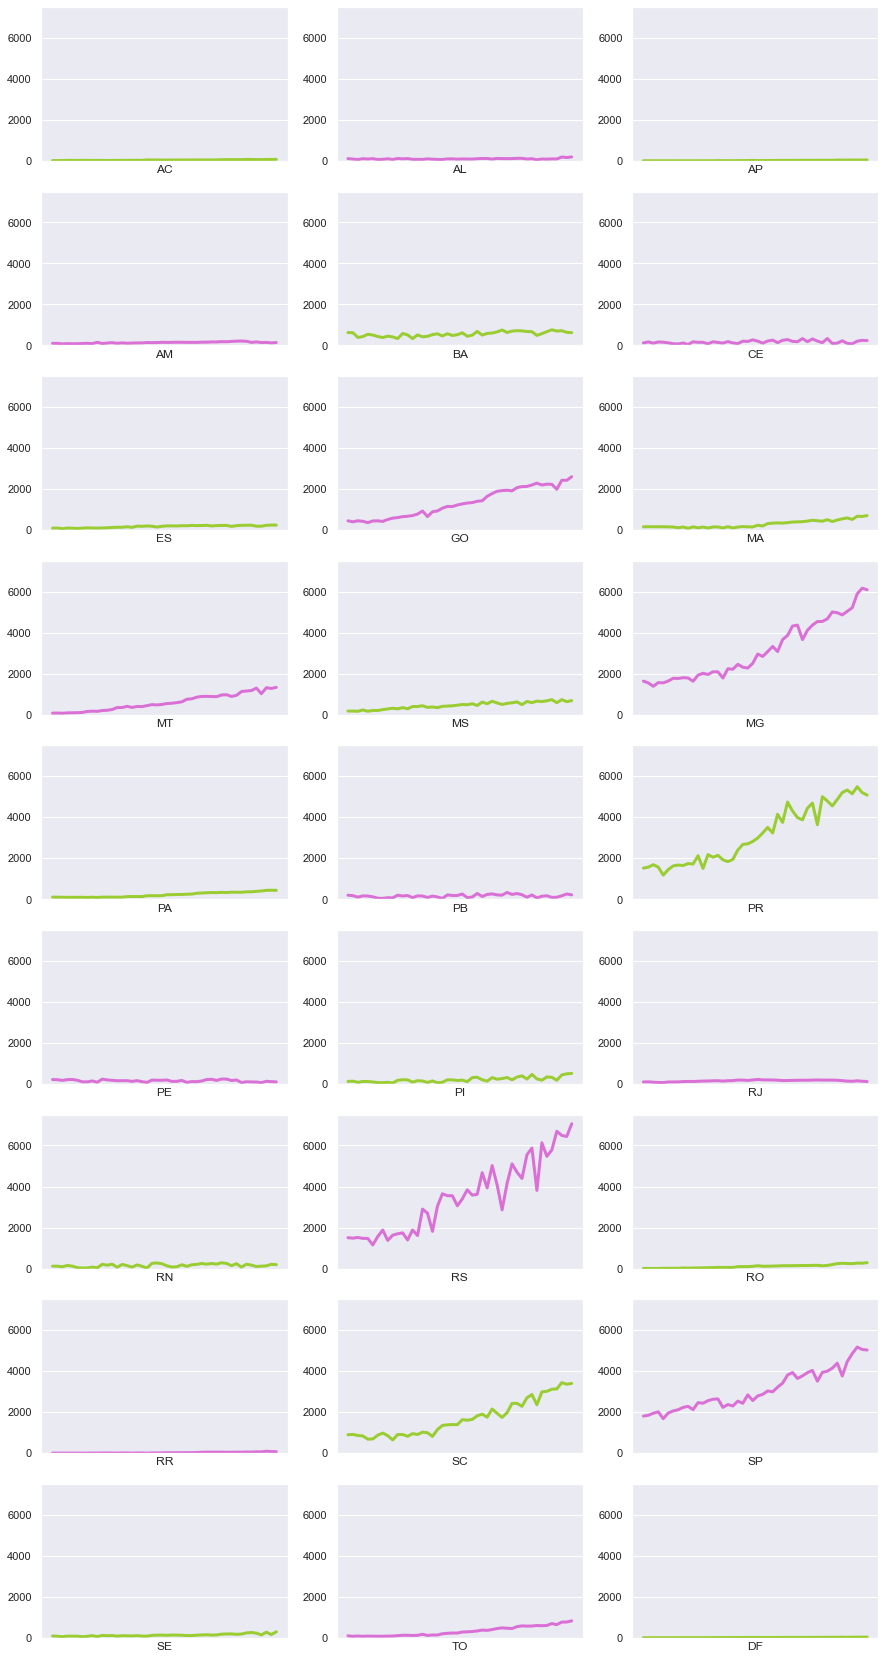

In [15]:
fig = plt.figure(figsize=(15,30))
# fig.suptitle('Produtividade total por estado')
gs = fig.add_gridspec(9,3)
plt.rcParams['lines.linewidth'] = 3
for index, state in enumerate(df_years):
    fig.add_subplot(gs[index//3, index%3])
    color = "orchid"
    if index % 2 == 0:
        color = "yellowgreen"
    sns.lineplot(x=df_years.index, y=df_years[state].values, color=color)
    plt.ylim([0,7500]) # ou deixar com escalas diferentes?
    plt.xticks([])
    plt.xlabel(state)
plt.show()

#Divisão por presidentes

In [1]:
anos_por_presidente = [['1974', '1975', '1976', '1977', '1978'], ['1979', '1980', '1981', '1982', '1983', '1984'], ['1985', '1986', '1987', '1988', '1989'], ['1990', '1991', '1992'], ['1993', '1994'], ['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002'], ['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010'], ['2011', '2012', '2013', '2014', '2015', '2016'], ['2017', '2018'], ['2019']]
presidentes = ['Ernesto Geisel', 'João Figueiredo', 'José Sarney', 'Fernando Collor', 'Itamar Franco', 'Fernando Henrique Cardoso', 'Lula', 'Dilma Rousseff', 'Michel Temer', 'Jair Bolsonaro']
direita = ['Ernesto Geisel', 'João Figueiredo', 'José Sarney', 'Fernando Collor', 'Itamar Franco', 'Fernando Henrique Cardoso', 'Michel Temer', 'Jair Bolsonaro']
esquerda = ['Lula', 'Dilma Rousseff']

In [16]:
df_president = pd.DataFrame(index=presidentes)
df_president[estados] = np.zeros((len(df_president.index), len(estados)))
for i in range(len(anos_por_presidente)):
    for estado in estados:
        df_president.iloc[i].loc[estado] = df_years[estado].loc[anos_por_presidente[i]].mean()
df_president.head()

,AC,AL,AP,AM,BA,CE,ES,GO,MA,MT,...,RJ,RN,RS,RO,RR,SC,SP,SE,TO,DF
Ernesto Geisel,17.307930,91.509851,5.407905,91.425960,524.400105,147.949285,90.929258,420.361315,162.561658,81.832915,...,84.708404,117.593168,1488.301995,7.237915,3.123844,839.623314,1859.241111,75.475583,82.963903,3.674180
João Figueiredo,21.150465,88.022600,4.621007,103.063311,422.961693,105.392750,97.347192,504.511048,136.281725,151.153748,...,108.013164,69.516910,1547.645214,19.839114,5.493862,825.949557,2128.842033,81.082259,84.694976,5.803720
José Sarney,20.821531,84.305340,6.346157,118.129909,473.771301,143.347785,135.700999,749.879268,133.285451,315.441519,...,144.937515,156.743971,1904.895341,43.684310,10.039069,923.805358,2546.591500,97.306075,130.492030,9.119482
Fernando Collor,25.195284,80.677339,8.806636,121.271949,515.457397,143.051121,170.056899,828.113878,124.352367,383.657433,...,153.086980,119.246394,2517.387588,54.963419,7.500969,988.831335,2301.734905,93.006520,130.027228,12.226437
Itamar Franco,43.253829,79.630886,12.945833,140.111806,518.138037,150.182791,194.740134,1111.829077,161.047403,466.965024,...,189.544495,141.822708,3598.312308,94.386534,6.624049,1367.781621,2484.861065,99.719453,208.854126,14.524670


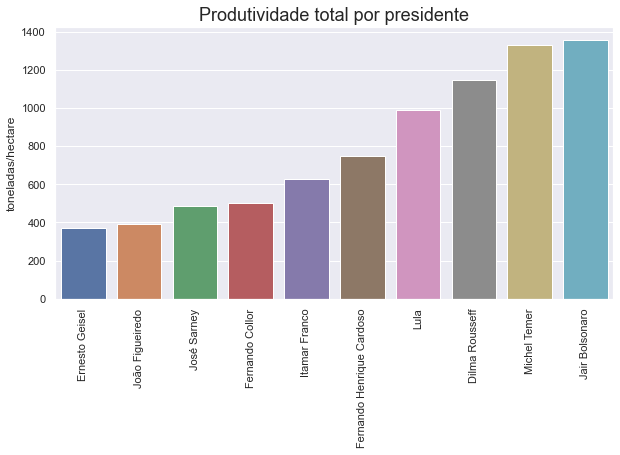

In [17]:
fig = plt.figure(figsize=(10,5))
sns.barplot(x=df_president.mean(axis=1).index, y=df_president.mean(axis=1).values)
plt.title('Produtividade total por presidente', fontsize=18)
plt.ylabel('toneladas/hectare')
plt.xticks(rotation=90)
plt.show()

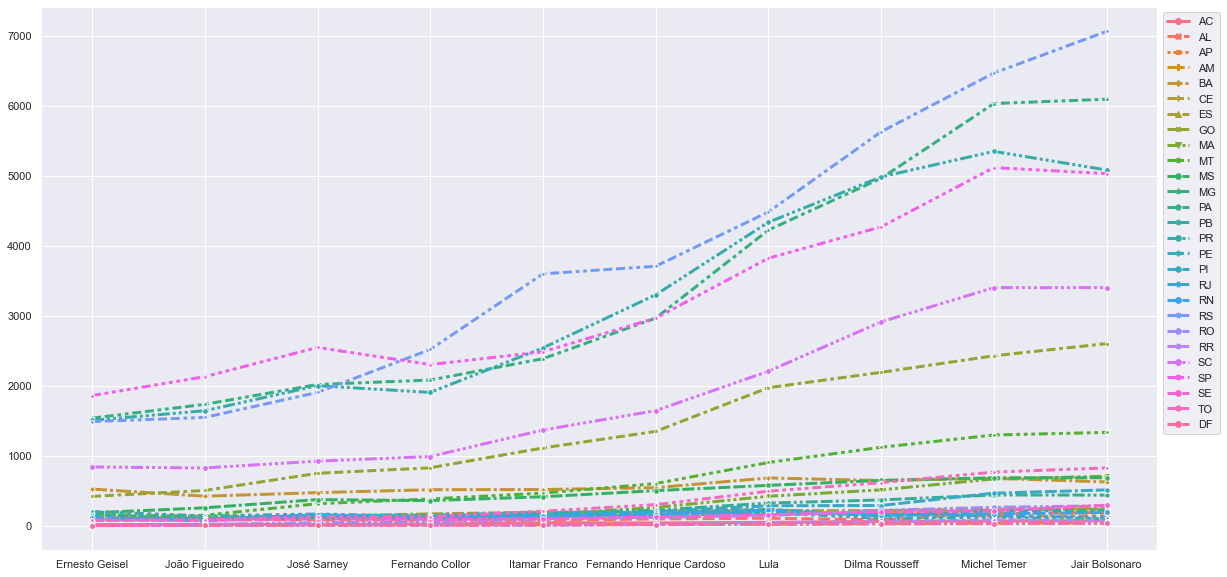

In [18]:
fig = plt.figure(figsize=(20,10))
sns.lineplot(data=df_president, markers=True)
plt.legend(bbox_to_anchor=(1,1))

#Teste de hipótese

In [19]:
def bootstrap_mean_ab(df1, df2, n=10000):
    size1 = len(df1.columns)
    size2 = len(df2.columns)
    values1 = np.zeros(n)
    values2 = np.zeros(n)
    values_diff = np.zeros(n)
    for i in range(n):
        sample1 = df1.sample(size1, replace=True, random_state=i)
        sample2 = df2.sample(size2, replace=True, random_state=i*3)
        values1[i] = sample1.mean().iloc[0]
        values2[i] = sample2.mean().iloc[0]
        values_diff[i] = sample1.mean().iloc[0] - sample2.mean().iloc[0]
    return values1, values2, values_diff

**Hipótese nula:** a orientação política do presidente não afeta a produtividade agrícola de grãos durante seu mandato.  
**Hipótese alternativa:** a orientação política do presidente afeta a produtividade agrícola de grãos durante seu mandato.

In [20]:
serie_direita = df_president.loc[direita].median(axis=0)
serie_esquerda = df_president.loc[esquerda].median(axis=0)

In [22]:
v_direita, v_esquerda, v_diff = bootstrap_mean_ab(pd.DataFrame(serie_direita), pd.DataFrame(serie_esquerda))

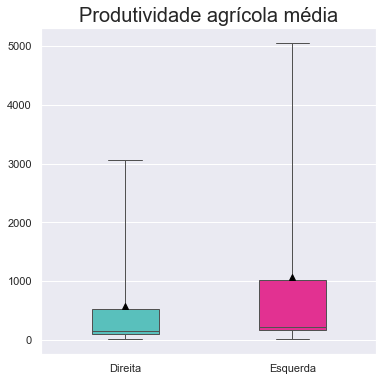

In [23]:
fig = plt.figure(figsize=(6,6))
plt.rcParams['lines.linewidth'] = 1
sns.boxplot(data=[v_direita, v_esquerda], whis=[2.5, 97.5], showfliers=False, showmeans=True, meanprops={"markeredgecolor": "black", "markerfacecolor": "black"}, width=0.4, palette=["mediumturquoise", "deeppink"])
plt.xticks([0,1], ['Direita', 'Esquerda'])
plt.title('Produtividade agrícola média', fontsize=20)
plt.show()

Não existe uma diferença significativa entre a produtividade de grãos com base na ideologia do presidente.

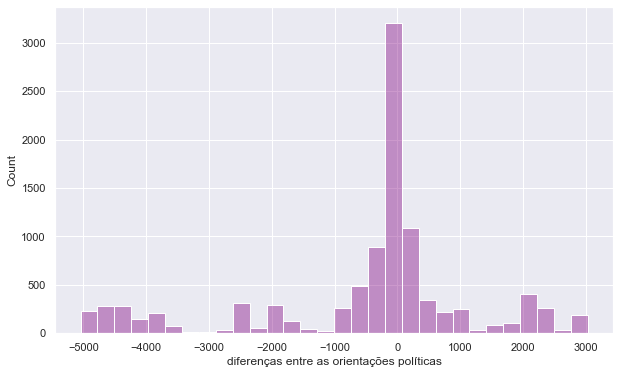

In [26]:
fig = plt.figure(figsize=(10,6))
sns.histplot(v_diff, bins=30, alpha=0.4, color="purple")
plt.xlabel("diferenças entre as orientações políticas")
plt.show()

O histograma das diferenças entre a produtividade agrícola durante os mandatos de presidentes com orientações políticas diferentes tem uma alta concentração no zero, o que mostra que essas diferenças não são estatisticamente significativas.